In [1]:
import pandas as pd
import warnings
import os
warnings.filterwarnings("ignore")
founders = ['A_J.39','C57BL_6J.39',
         '129S1_SvImJ.39','NOD_ShiLtJ.39',
         'NZO_HlLtJ.39','CAST_EiJ.39',
         'PWK_PhJ.39','WSB_EiJ.39']


# Load enformer prediction results

In [2]:
df = pd.read_csv("/projects/compsci/vmp/USERS/chenm/mahoney/enformer/results/df_enformer_results_combined.csv")
print(df.shape)
df.head()


(257290, 1646)


,gene_id,strain,chr,0,1,2,3,4,5,6,...,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642
0,ENSMUSG00000102095,A_J.39,1,0.040924,0.056700,0.067874,0.067091,0.080475,0.083420,0.112752,...,0.075877,0.037519,0.042378,0.011139,0.015951,0.020407,0.153650,0.295805,0.506962,0.447128
1,ENSMUSG00000100635,A_J.39,1,0.050041,0.088189,0.073688,0.074054,0.095278,0.135458,0.078608,...,0.131363,0.066115,0.042751,0.013250,0.015378,0.016447,0.163415,0.289335,0.503353,0.463163
2,ENSMUSG00000100480,A_J.39,1,0.084338,0.113319,0.102513,0.118447,0.127997,0.180727,0.117222,...,0.078001,0.074148,0.056194,0.016264,0.025024,0.027550,0.186570,0.388947,0.630922,0.580891
3,ENSMUSG00000051285,A_J.39,1,11.406491,7.716231,15.528511,17.759916,9.733851,8.122746,8.890949,...,31.664043,17.077888,27.121246,16.581524,5.318263,8.928493,113.247280,62.031834,168.752290,112.973870
4,ENSMUSG00000097797,A_J.39,1,0.038032,0.050995,0.061002,0.057124,0.064742,0.054396,0.067352,...,0.022418,0.023875,0.019316,0.006881,0.010625,0.011407,0.059720,0.137251,0.210507,0.212218


# Get index for "CAGE/kidney, neonate N30"

In [6]:
xls_file = pd.ExcelFile('/projects/compsci/vmp/USERS/chenm/mahoney/41592_2021_1252_MOESM3_ESM.xlsx')
table3 = pd.read_excel(xls_file, 'Supplementary Table 3')
table_kidney = table3[table3["target"].str.contains("CAGE.*kidney", case=False)]
idx = int(table_kidney[table_kidney["target"] == "CAGE/kidney, neonate N30"]["index"].values[0])
idx

1486

# Subset data for kidney

In [4]:
df1 = df[["gene_id", "strain",str(idx)]]
df1 = df1.pivot(index='gene_id', columns='strain', values='1486')
df1 = df1.rename_axis(None, axis=1)
df1.index.name = None
df1=df1[founders]
df1.head()

,A_J.39,C57BL_6J.39,129S1_SvImJ.39,NOD_ShiLtJ.39,NZO_HlLtJ.39,CAST_EiJ.39,PWK_PhJ.39,WSB_EiJ.39
ENSMUSG00000000001,0.049765,0.048920,0.049122,0.049227,0.050158,0.048122,0.045916,0.051393
ENSMUSG00000000003,0.014430,0.014326,0.014357,0.014270,0.014303,0.014515,0.013959,0.013886
ENSMUSG00000000028,0.031238,0.030873,0.036669,0.035723,0.034632,0.035794,0.024808,0.065200
ENSMUSG00000000031,0.036824,0.035651,0.036549,0.036504,0.035527,0.026394,0.040590,0.038191
ENSMUSG00000000037,0.072779,0.070523,0.071213,0.072089,0.070493,0.077485,0.070508,0.071433


# load results from fit1   

In [5]:
coeff = pd.read_csv("/projects/compsci/vmp/USERS/chenm/mahoney/enformer/coef.csv", index_col=0)
coeff.index.name = None
coeff=coeff[founders]
coeff.head()

,A_J.39,C57BL_6J.39,129S1_SvImJ.39,NOD_ShiLtJ.39,NZO_HlLtJ.39,CAST_EiJ.39,PWK_PhJ.39,WSB_EiJ.39
ENSMUSG00000047161,-0.498581,-0.093295,-0.500440,-0.130275,-0.487592,1.316803,0.587094,-0.193715
ENSMUSG00000024304,0.205040,-0.261483,-0.455192,-0.093108,0.361598,0.618787,0.822598,-1.198240
ENSMUSG00000048799,-0.360155,0.930250,0.373395,-0.519172,-0.374051,-0.185820,0.231440,-0.095888
ENSMUSG00000065968,-0.536406,-0.807652,-0.388914,-0.306765,-0.587354,-0.365935,0.428445,2.564582
ENSMUSG00000044117,-0.879358,-0.646034,-0.484108,-0.414475,-0.620078,-0.375805,0.751620,2.668237


In [17]:
df1 = df1.dropna()
# subset common genes
gene_list = list(set(df1.index) & set(coeff.index))
df1 = df1.loc[gene_list]     
coeff = coeff.loc[gene_list]
print(len(gene_list))
print(coeff.shape)
coeff.dropna()
print(coeff.shape)

19122
(19122, 8)
(19122, 8)


In [19]:
df1.head()

,A_J.39,C57BL_6J.39,129S1_SvImJ.39,NOD_ShiLtJ.39,NZO_HlLtJ.39,CAST_EiJ.39,PWK_PhJ.39,WSB_EiJ.39
ENSMUSG00000028101,27.542030,26.298580,32.733920,23.659622,23.654373,23.087050,17.782732,25.493082
ENSMUSG00000101952,0.043337,0.044733,0.041011,0.041613,0.041534,0.038767,0.047427,0.040143
ENSMUSG00000073591,0.026507,0.026998,0.026831,0.029640,0.027967,0.031224,0.028074,0.028270
ENSMUSG00000059493,0.029242,0.027070,0.027819,0.027323,0.027549,0.026791,0.026542,0.031042
ENSMUSG00000050103,1.074703,0.910497,0.918945,0.713322,0.958209,0.689044,0.652330,1.700090


In [20]:
coeff.head()

,A_J.39,C57BL_6J.39,129S1_SvImJ.39,NOD_ShiLtJ.39,NZO_HlLtJ.39,CAST_EiJ.39,PWK_PhJ.39,WSB_EiJ.39
ENSMUSG00000028101,-0.082711,0.316362,-0.539056,0.482983,0.001208,-0.311952,0.286247,-0.153080
ENSMUSG00000101952,-0.127202,-0.218820,-0.116523,-0.018414,-0.011955,0.002550,0.495301,-0.004938
ENSMUSG00000073591,0.743424,0.198448,-0.460580,-0.574445,-0.246385,-0.041108,0.508695,-0.128049
ENSMUSG00000059493,-0.621041,-0.117380,-0.355019,-0.100556,-0.516319,0.653577,1.065611,-0.008873
ENSMUSG00000050103,-0.307819,0.159810,0.216039,0.180364,0.139816,-0.371643,-1.751480,1.734914


In [28]:
from scipy.stats import spearmanr
spearmanr(df1.loc["ENSMUSG00000000001"], coeff.loc["ENSMUSG00000000001"])

SpearmanrResult(correlation=0.4761904761904762, pvalue=0.23293553465009798)

# Compare 8 allele effects with enformer predicted values 

In [30]:
#Spearman rank correlations 
s = df1.corrwith(other=coeff, method="spearman",  axis=1)
s.head()

ENSMUSG00000028101   -0.285714
ENSMUSG00000101952   -0.261905
ENSMUSG00000073591   -0.333333
ENSMUSG00000059493   -0.595238
ENSMUSG00000050103    0.595238
dtype: float64

# Plot correlation coefficient distribution 

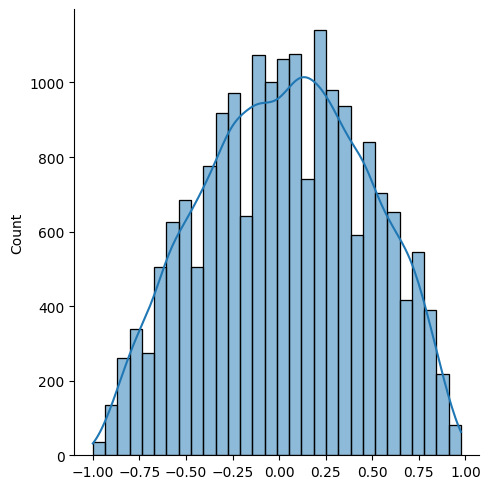

In [31]:
import seaborn as sns
sns.displot(s.values, kde=True, bins=30)

In [32]:
s2 = df1.corrwith(other=coeff, method="spearman",  axis=0)
s2

A_J.39            0.031825
C57BL_6J.39       0.025716
129S1_SvImJ.39    0.025764
NOD_ShiLtJ.39     0.008578
NZO_HlLtJ.39      0.021981
CAST_EiJ.39      -0.015344
PWK_PhJ.39       -0.004950
WSB_EiJ.39        0.017970
dtype: float64